## VERİ HAZIRLAMA



In [ ]:

import os
import cv2

dosya_yolu = ('C:/Users/MEHMET/Desktop/Tez/brain')
data = [] # Görüntülerin depolanacağı liste
labels = [] # Etiketlerin depolanacağı liste

# 'tumor' ve 'normal' olmak üzere iki sınıf için döngü ile klasörler gezilecektir
for case in ['tumor', 'normal']:
    case_path = os.path.join(dosya_yolu, case)

    # Klasörün var olduğunu kontrol et
    if not os.path.exists(case_path):
        print(f"{case_path} bulunamadı.")
        continue

    for file_name in os.listdir(case_path):
        file_path = os.path.join(case_path, file_name)

        # Dosyayı okuyup float32 türünde bir diziye dönüştürme
        image = cv2.imread(file_path).astype('float32')

        # Görüntüyü 224x224 boyutune yeniden boyutlandırma ve veri listesine ekleme
        data.append(cv2.resize(image, (224, 224)))

        # Etiket listesine sınıf adını ekleme
        labels.append(case)


## LabelBinarizer ve to_categorical kullanımı

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer() # LabelBinarizer objesi oluşturma
labels_encoded = lb.fit_transform(labels) # Etiketleri ikili formda (binary) temsil etmek için LabelBinarizer kullanarak dönüşüm yapma
labelss = to_categorical(labels_encoded) # Kategorik (one-hot) dönüşüm: ikili etiketlerden one-hot encoding'e geçiş yapma

## Verileri numpy dizisine dönüştürme

In [ ]:
import numpy as np
data = np.array(data) # Veri listesini numpy dizisine dönüştürme
labelss = np.array(labelss) # Etiket listesini numpy dizisine dönüştürme

## Normalizasyon

In [ ]:
# Normalizasyondan önce dataların içeriği

data[10]

array([[[176.63095   , 176.63095   , 176.63095   ],
        [ 89.969246  ,  89.969246  ,  89.969246  ],
        [104.96217   , 104.96217   , 104.96217   ],
        ...,
        [101.42939   , 101.42939   , 101.42939   ],
        [ 88.511665  ,  88.511665  ,  88.511665  ],
        [177.28885   , 177.28885   , 177.28885   ]],

       [[117.54606   , 117.54606   , 117.54606   ],
        [ 16.785078  ,  16.785078  ,  16.785078  ],
        [ 11.364159  ,  11.364159  ,  11.364159  ],
        ...,
        [  1.8415178 ,   1.8415178 ,   1.8415178 ],
        [  5.581852  ,   5.581852  ,   5.581852  ],
        [115.3063    , 115.3063    , 115.3063    ]],

       [[112.83034   , 112.83034   , 112.83034   ],
        [ 12.102958  ,  12.102958  ,  12.102958  ],
        [ 11.258729  ,  11.258729  ,  11.258729  ],
        ...,
        [ 24.855967  ,  24.855967  ,  24.855967  ],
        [ 10.178233  ,  10.178233  ,  10.178233  ],
        [110.866745  , 110.866745  , 110.866745  ]],

       ...,

      

In [ ]:
def process_images(images):
    processed_images = []
    # Her bir görüntüyü 0 ile 1 arasına normalize etme işlemi yapılır
    for img in images:
        img = img / 255.0  # Görüntüyü 0-255 aralığından 0-1 aralığına dönüştürür
        processed_images.append(img)
    return np.array(processed_images)  # İşlenmiş görüntüleri numpy dizisine dönüştürerek döndürür

# Veri kümesinin görüntülerini işleyerek normalize edilmiş veri seti oluşturulur
data_processed = process_images(data)

In [ ]:
data_processed[10]

array([[[0.6926704 , 0.6926704 , 0.6926704 ],
        [0.35282058, 0.35282058, 0.35282058],
        [0.41161636, 0.41161636, 0.41161636],
        ...,
        [0.39776233, 0.39776233, 0.39776233],
        [0.34710458, 0.34710458, 0.34710458],
        [0.6952504 , 0.6952504 , 0.6952504 ]],

       [[0.46096495, 0.46096495, 0.46096495],
        [0.06582384, 0.06582384, 0.06582384],
        [0.04456533, 0.04456533, 0.04456533],
        ...,
        [0.00722164, 0.00722164, 0.00722164],
        [0.02188962, 0.02188962, 0.02188962],
        [0.45218155, 0.45218155, 0.45218155]],

       [[0.44247192, 0.44247192, 0.44247192],
        [0.04746258, 0.04746258, 0.04746258],
        [0.04415188, 0.04415188, 0.04415188],
        ...,
        [0.09747438, 0.09747438, 0.09747438],
        [0.03991464, 0.03991464, 0.03991464],
        [0.43477154, 0.43477154, 0.43477154]],

       ...,

       [[0.43608192, 0.43608192, 0.43608192],
        [0.02324946, 0.02324946, 0.02324946],
        [0.05332633, 0

## TRAIN - TEST VERİ AYRIMI

In [ ]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(data_processed, labelss, test_size=0.10, random_state=25)
print("Train Veri Sayısı : ",x_train.shape[0])
print("Test Veri Sayısı : ",x_test.shape[0])

Train Veri Sayısı :  2700
Test Veri Sayısı :  300


In [ ]:
x_train.shape

(2700, 224, 224, 3)

## VERİLERİ VEKTÖR FORMATINA ÇEVİRME

In [ ]:
X_train=x_train.reshape(x_train.shape[0],-1)
X_test=x_test.reshape(x_test.shape[0],-1)

In [ ]:
X_train.shape

(2700, 150528)

In [ ]:
Y_train=np.argmax(y_train,axis=1)
Y_test=np.argmax(y_test,axis=1)

In [ ]:
Y_train.shape

(2700,)

In [ ]:
from sklearn.metrics import classification_report

def print_classification_report(model, X_test, y_test):
    class_names = ['Tumor', 'Normal']  # Sınıf isimleri

    # Eğer sınıf isimleri belirtilmemişse, default olarak 'Class 0', 'Class 1' şeklinde isimler atanır.
    if class_names is None:
        class_names = ['Class ' + str(i) for i in range(len(set(y_test)))]

    y_pred = model.predict(X_test)  # Modelin X_test veri kümesi üzerinde tahmin yapması
    report = classification_report(y_test, y_pred, target_names=class_names)  # Classification report oluşturulması
    print(report)

## VERİLERİN DAĞILIM GRAFİKLERİ

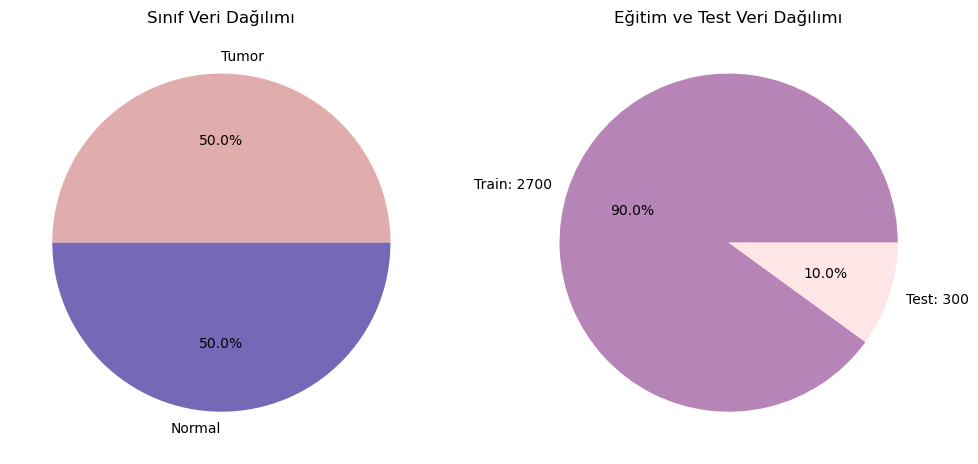

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 'tumor' ve 'normal' etiketlerinin sayısını bulmak için bir dictionary kullanılabilir
labels_count = {'tumor': 0, 'normal': 0}

# labels listesini döngü ile gezerek her bir etiketin sayısını güncelleme
for i in labels:
    labels_count[i] += 1

# Veri tanımları
labels1 = 'Tumor', 'Normal'
sizes1 = [labels_count['tumor'], labels_count['normal']]

# x_train ve x_test veri uzunluklarını alma
train_count = len(x_train)
test_count = len(x_test)

# Toplam veri sayısı
total_count = train_count + test_count

# Train ve test veri yüzdelik oranlarını hesaplama
train_percent = (train_count / total_count) * 100
test_percent = (test_count / total_count) * 100

# İlk pasta grafiği
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(sizes1, labels=labels1, colors=['#E1ACAC', '#7469B6'], autopct='%1.1f%%')
axs[0].set_title('Sınıf Veri Dağılımı')

# İkinci pasta grafiği
axs[1].pie([train_percent, test_percent], labels=['Train: 2700', 'Test: 300'], colors=['#B784B7', '#FFE6E6'], autopct='%1.1f%%')
axs[1].set_title('Eğitim ve Test Veri Dağılımı')

plt.show()

## Veri kümesinden Örnek Görüntüler

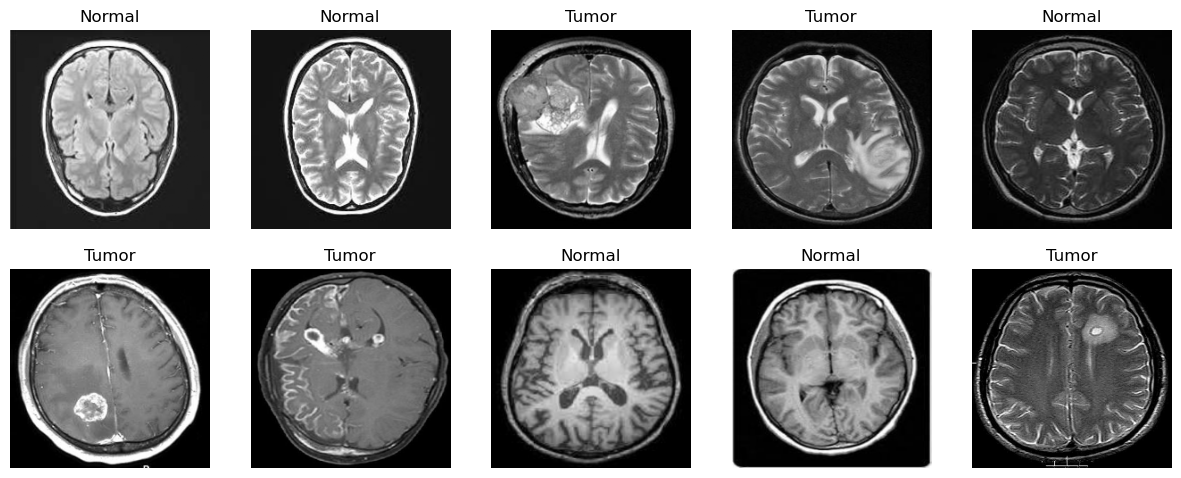

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Şekil oluşturma ve boyutunu belirleme
plt.figure(figsize=(15, 15))

# Veriden rastgele 10 öğe seçme
indices = np.random.choice(len(data), size=10, replace=False)

# Seçilen öğeleri görselleştirme döngüsü
for i, index in enumerate(indices):
    # 5x5 bir alt grafik düzeni oluşturma, i+1 ile indeks düzenlemesi
    plt.subplot(5, 5, i+1)

    # Veriyi normalize ederek görselleştirme
    plt.imshow(data[index] / 255.0)

    # Etiket kontrolü yaparak başlık belirleme
    if labels[index] == 'normal':
        plt.title("Normal")
    else:
        plt.title("Tumor")


    plt.axis('off')

# Şekli gösterme
plt.show()

## DEĞERLENDİRME METRİKLERİ

### Sınıflandırma Raporu

In [ ]:
from sklearn.metrics import classification_report

def print_classification_report(model, X_test, y_test):
    class_names = ['Tumor', 'Normal']  # Sınıf isimleri

    # Eğer sınıf isimleri belirtilmemişse, default olarak 'Class 0', 'Class 1' şeklinde isimler atanır.
    if class_names is None:
        class_names = ['Class ' + str(i) for i in range(len(set(y_test)))]

    y_pred = model.predict(X_test)  # Modelin X_test veri kümesi üzerinde tahmin yapması
    report = classification_report(y_test, y_pred, target_names=class_names)  # Classification report oluşturulması
    print(report)

### Konfüzyon Matrisi

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    class_labels = ["Tumor", "Normal"]  # Sınıf etiketleri

    # Modelin X_test üzerinde tahmin yapması
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Confusion matrix'i görselleştirme
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted labels')  # Tahmin edilen sınıf etiketleri
    plt.ylabel('True labels')       # Gerçek sınıf etiketleri
    plt.title('Confusion Matrix')
    plt.show()

## Makine Öğrenimi Modelleri

### KNN (K-Nearest Neighbors)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score


# KNeighborsClassifier nesnesini oluşturma ve tüm parametreleri belirleme
knn = KNeighborsClassifier(
    n_neighbors=7,  # Kullanılacak komşu sayısı
    weights='distance',  # Komşulara verilecek ağırlıklar ('uniform' veya 'distance')
    algorithm='auto',  # Kullanılacak algoritma ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,  # BallTree veya KDTree kullanılıyorsa, yaprak düğümlerinin boyutu
    p=2,  # Minkowski metriğinde kullanılacak güç parametresi (varsayılan olarak 2)
    metric='minkowski',  # Komşuluk metriği (varsayılan olarak 'minkowski')
    metric_params=None,  # Metric fonksiyonu için ek parametreler
    n_jobs=None  # Komşuluk sorgusu yapılırken kullnılacak iş parçacığı sayısı
)

# Cross-validation işlemi için k-kat sayısını belirleme (örneğin k=5)
k = 5

# Cross-validation ile modelin performansını değerlendirme
cv_scores = cross_val_score(knn, X_train, Y_train, cv=k)

# Elde edilen cross-validation skorlarını yazdırma
print("Cross-validation skorları:", cv_scores)

# Ortalama cross-validation skorunu hesaplama
mean_cv_score = cv_scores.mean()
print("Ortalama cross-validation skoru:", mean_cv_score)

# Modele eğitmek için X_train ve y_train'i vererek eğitimi başlatma
knn.fit(X_train, Y_train)

# Test verisi üzerinde tahmin yapma
y_pred=knn.predict(X_test)


# Test metriklerini hesaplama ve yazdırma
print('Test accuracy: ',accuracy_score(Y_test,y_pred))
print('f1-score: ', f1_score(Y_test,y_pred, average='weighted'))
print('recall: ',recall_score(Y_test,y_pred, average='weighted'))
print('precision: ',precision_score(Y_test,y_pred, average='weighted'))


Cross-validation skorları: [0.86296296 0.89074074 0.85       0.88333333 0.86296296]
Ortalama cross-validation skoru: 0.8699999999999999
Test accuracy:  0.9033333333333333
f1-score:  0.9025439392411869
recall:  0.9033333333333333
precision:  0.9168389141518534


In [ ]:
print_classification_report(knn, X_test, Y_test)

              precision    recall  f1-score   support

       Tumor       0.84      0.99      0.91       150
      Normal       0.99      0.81      0.89       150

    accuracy                           0.90       300
   macro avg       0.92      0.90      0.90       300
weighted avg       0.92      0.90      0.90       300



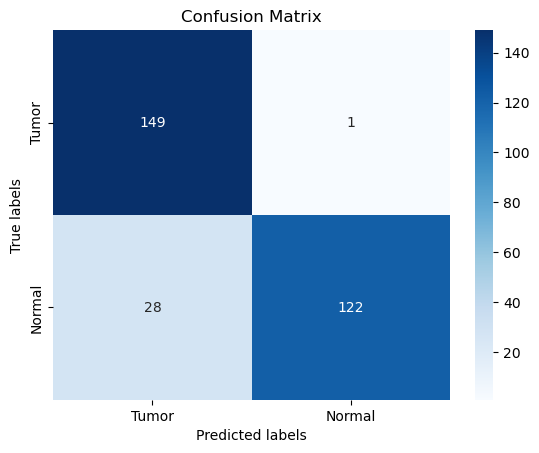

In [ ]:
plot_confusion_matrix(knn, X_test, Y_test)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier nesnesini oluşturna ve tüm parametreleri belirleme
dtc = DecisionTreeClassifier(
    criterion='gini',  # Bölme kriteri ('gini' veya 'entropy')
    splitter='best',  # Bölme stratejisi ('best' veya 'random')
    max_depth=None,  # Karar ağacının maksimum derinliği
    min_samples_split=2,  # Bir iç düğümü bölmeden önce gereken minimum örnek sayısı
    min_samples_leaf=1,  # Bir yaprak düğümü oluşturmak için gereken minimum örnek sayısı
    min_weight_fraction_leaf=0.0,  # Bir yaprak düğümü oluşturmak için gereken minimum ağırlık fraksiyonu
    max_features=None,  # Her bölme için değerlendirilecek maksimum özellik sayısı
    random_state=None,  # Rastgelelik durumu
    max_leaf_nodes=None,  # Maksimum yaprak düğüm sayısı
    min_impurity_decrease=0.0,  # Bölme yaparken gereken minimum impurity decrease
    class_weight=None,  # Sınıf ağırlıkları
    ccp_alpha=0.0  # Cost-complexity pruning parametresi
)

# Cross-validation işlemi için k-kat sayısını belirleme (örneğin k=5)
k = 5

# Cross-validation ile modelin performansını değerlendirme
cv_scores = cross_val_score(knn, X_train, Y_train, cv=k)

# Elde edilen cross-validation skorlarını yazdırma
print("Cross-validation skorları:", cv_scores)

# Ortalama cross-validation skorunu hesaplama
mean_cv_score = cv_scores.mean()
print("Ortalama cross-validation skoru:", mean_cv_score)

# Modele eğitmek için X_train ve y_train'i vererek eğitimi başlatma
dtc.fit(X_train, Y_train)

# Test verisi üzerinde tahmin yapma
y_pred=dtc.predict(X_test)

Cross-validation skorları: [0.86296296 0.89074074 0.85       0.88333333 0.86296296]
Ortalama cross-validation skoru: 0.8699999999999999


In [ ]:
# Test metriklerini hesaplama ve yazdırma
print('Test accuracy: ',accuracy_score(Y_test,y_pred))
print('f1-score: ', f1_score(Y_test,y_pred, average='weighted'))
print('recall: ',recall_score(Y_test,y_pred, average='weighted'))
print('precision: ',precision_score(Y_test,y_pred, average='weighted'))

Test accuracy:  0.8666666666666667
f1-score:  0.8666133119914631
recall:  0.8666666666666667
precision:  0.8672542735042735


In [ ]:
print_classification_report(dtc, X_test, Y_test)

              precision    recall  f1-score   support

       Tumor       0.85      0.89      0.87       150
      Normal       0.88      0.85      0.86       150

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



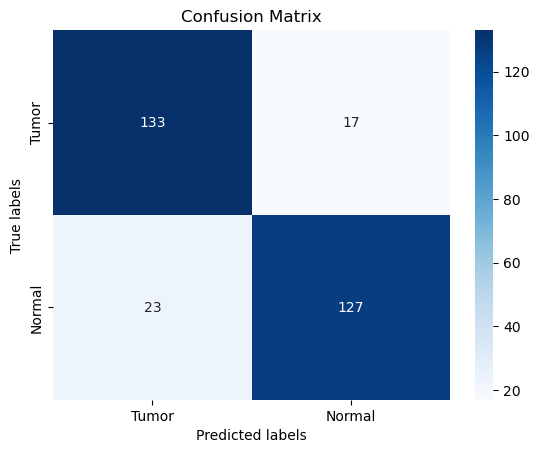

In [ ]:
plot_confusion_matrix(dtc, X_test, Y_test)

## YAPAY SİNİR AĞI

In [ ]:
from sklearn.model_selection import KFold
# 5 katlı çapraz doğrulama (cross-validation) için KFold oluşturma
kfold = KFold(n_splits=5, shuffle=True)
# Sonuçların kaydedileceği dizin yolu
path = r"C:/Users/MEHMET/Desktop/Tez/brain"

## Yapay Sinir Ağları ve Evrişimli Sinir Ağları için sınıflandırma raporu ve karmaşıklık matrisi metrikleri

### Sınıflandırma Raporu

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def cls_report(model, test_data, test_label):
    # Modelin tahminlerini yapma
    y_score = model.predict(test_data)

    # Sınıf isimleri
    class_names = ['Tumor', 'Normal']

    # Classification report hesaplama
    result = classification_report(test_label.argmax(axis=1), y_score.argmax(axis=1), target_names=class_names)

    # Confusion matrix hesaplama
    conf_mat = confusion_matrix(test_label.argmax(axis=1), y_score.argmax(axis=1))

    # Sonuçları ve confusion matrix'i ekrana yazdırma
    print("Classification Report".center(56))
    print("-"*56)
    print(result)
    print("-"*56)

    return result, conf_mat

### Konfüzyon Matrisi

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def confusion(model, test_data, test_label):
    # Modelin tahminlerini yapma
    y_score = model.predict(test_data)

    # Sınıf isimleri
    class_names = ['Tumor', 'Normal']

    # Confusion matrix hesaplama
    conf_mat = confusion_matrix(test_label.argmax(axis=1), y_score.argmax(axis=1))

    # ConfusionMatrixDisplay objesini oluşturma
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=class_names)

    # Confusion matrix'i görselleştirme
    disp.plot(cmap='summer')

    # Görsel başlığını ayarlama
    plt.title("Confusion Matrix")

    # Görseli ekrana getirme
    plt.show()

In [ ]:

# Model Oluşturma
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=2)
Y_test = to_categorical(Y_test, num_classes=2)

# Modeli oluşturma
ysa = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224,3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax')])
ysa.summary()







Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               77070848  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 77,071,874
Trainable params: 77,071,874
Non-trainable params: 0
_________________________________________________________________


----------------------------------------------------------------------------------------------------
1. Fold Eğitiliyor...
Epoch 1/20
675/675 [==============================] - 137s 203ms/step - loss: 6.0132 - accuracy: 0.7241 - precision: 0.7241 - recall: 0.7241 - auc: 0.7599 - val_loss: 1.0220 - val_accuracy: 0.7670 - val_precision: 0.7670 - val_recall: 0.7670 - val_auc: 0.8350
Epoch 2/20
675/675 [==============================] - 144s 213ms/step - loss: 0.3308 - accuracy: 0.8796 - precision: 0.8796 - recall: 0.8796 - auc: 0.9443 - val_loss: 0.1724 - val_accuracy: 0.9356 - val_precision: 0.9356 - val_recall: 0.9356 - val_auc: 0.9819
Epoch 3/20
675/675 [==============================] - 141s 209ms/step - loss: 0.2581 - accuracy: 0.9085 - precision: 0.9085 - recall: 0.9085 - auc: 0.9638 - val_loss: 0.1168 - val_accuracy: 0.9604 - val_precision: 0.9604 - val_recall: 0.9604 - val_auc: 0.9922
Epoch 4/20
675/675 [==============================] - 143s 211ms/step - loss: 0.2011 - accuracy: 

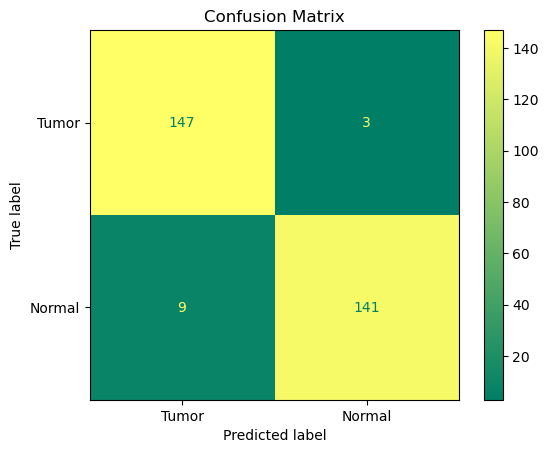

Execution Time :  2764.2449054718018
****************************************************************************************************


In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import numpy as np
from time import time
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Her katlama için model geçmişi ve skorlarını saklamak için listeler oluşturma
model_history_per_fold = []
per_fold_scores = []

# Başlangıç zamanını kaydetme
start = time()

# Her bir katlamada döngü yapma
fold_no = 1

 # Yeni bir Sequential modeli oluşturma
ysa = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])

# Model kontrol noktası için yol oluşturma ve ModelCheckpoint callback'ini tanımlama
checkpoint_filepath = f'model_fold_{fold_no}.h5'
model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_loss',
        mode='min',
        save_best_only=True
    )


# Optimizasyon sonuçlarından alınan learning rate değerini belirtme (örnek)

optimized_learning_rate = 0.004261879524120684  # Örnek olarak, kendi değerinizi ekleme

# ReduceLROnPlateau callback'ine learning rate'i entegre etme
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001, verbose=1, min_delta=1e-5)
reduce_lr.learning_rate = optimized_learning_rate  # learning rate'i ayarlama


# EarlyStopping callback'ini tanımlama
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)


# Callback'leri bir listede toplama
callbacks = [model_checkpoint_callback, reduce_lr, early_stopping]

# Modeli derleme
ysa.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy',
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.AUC(name='auc')])


# Model eğitimini başlatma
history = ysa.fit(x_train, y_train,
                      validation_data=(x_train, y_train),
                      batch_size=4,
                      epochs=20,
                      callbacks=callbacks,
                      verbose=1)



# Modeli test etme ve performans metriklerini değerlendirme
print(f'{fold_no}. Fold Test Ediliyor...')
scores = ysa.evaluate(x_test, y_test)
report = cls_report(ysa, x_test, y_test)
confusion(ysa, x_test, y_test)

# Eğitim süresini hesaplama
end = time()
execution_time = end - start




# Eğitim süresini ve işlemin tamamlandığını bildirme
print("Execution Time : ", execution_time)
print('*' * 100)



## Evrişimli Sinir Ağı (RNN)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, InputLayer, BatchNormalization

model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu',padding = 'Same', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(16, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(32, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation="softmax"))

model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 112, 112, 8)       584       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 56, 56, 8)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 56, 8)         32        
_________________________________________________________________
dropout_3 (Dropout)          (None, 56, 56, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 56, 56, 16)       

----------------------------------------------------------------------------------------------------
Epoch 1/20
675/675 [==============================] - 30s 44ms/step - loss: 0.4245 - accuracy: 0.8241 - precision: 0.8241 - recall: 0.8241 - auc: 0.8985 - val_loss: 0.3789 - val_accuracy: 0.8219 - val_precision: 0.8219 - val_recall: 0.8219 - val_auc: 0.9124
Epoch 2/20
675/675 [==============================] - 32s 47ms/step - loss: 0.2220 - accuracy: 0.9104 - precision: 0.9104 - recall: 0.9104 - auc: 0.9704 - val_loss: 0.1271 - val_accuracy: 0.9478 - val_precision: 0.9478 - val_recall: 0.9478 - val_auc: 0.9917
Epoch 3/20
675/675 [==============================] - 30s 45ms/step - loss: 0.1253 - accuracy: 0.9559 - precision: 0.9559 - recall: 0.9559 - auc: 0.9897 - val_loss: 0.0538 - val_accuracy: 0.9852 - val_precision: 0.9852 - val_recall: 0.9852 - val_auc: 0.9984
Epoch 4/20
675/675 [==============================] - 32s 48ms/step - loss: 0.0865 - accuracy: 0.9696 - precision: 0.9696 - r

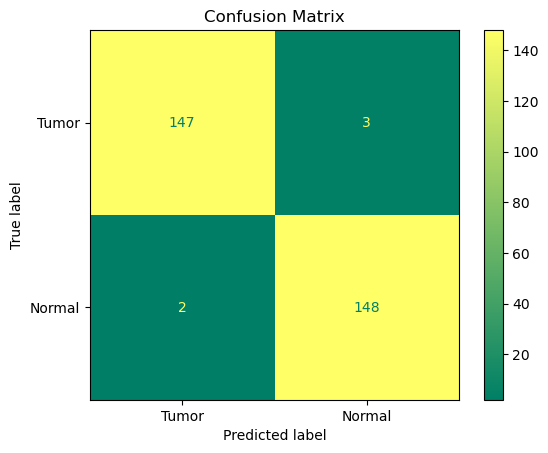

Doğruluk:  98.33333492279053
Kayıp:     0.10260927677154541


In [ ]:
fold_no = 1
model_history_per_fold = []
per_fold_scores = []
start = time()

# Model kontrol noktası için yol oluşturma ve ModelCheckpoint callback'ini tanımlama
checkpoint_filepath = f'model_fold_{fold_no}.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

# Optimizasyon sonuçlarından alınan learning rate değerini belirtme (örnek)
optimized_learning_rate = 0.004261879524120684  # Örnek olarak, kendi değerinizi ekleme

# ReduceLROnPlateau callback'ine learning rate'i entegre etme
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001, verbose=1, min_delta=1e-5)
reduce_lr.learning_rate = optimized_learning_rate  # learning rate'i ayarlama

# EarlyStopping callback'ini tanımlama
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

# Callback'leri bir listede toplama
callbacks = [model_checkpoint_callback, reduce_lr, early_stopping]

# Modeli derleme
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy',
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall'),
                    tf.keras.metrics.AUC(name='auc')])


# Model eğitimini başlatma
print('-' * 100)

history = model.fit(x_train, y_train,
                    validation_data=(x_train, y_train),
                    batch_size=4,
                    epochs=20,
                    callbacks=callbacks,
                    verbose=1)

# Model eğitimi tamamlandıktan sonra geçmişi kaydetme
model_history_per_fold.append(history.history)

# Modeli test etme ve performans metriklerini değerlendirme
scores = model.evaluate(x_test, y_test)
report = cls_report(model, x_test, y_test)
confusion(model, x_test, y_test)

# Fold'a özgü skorları kaydetme
per_fold_scores.append(scores)
print("Doğruluk: ", scores[1] * 100)
print("Kayıp:    ", scores[0])


# Eğitim süresini hesaplama
end = time()
execution_time = end - start


# Model geçmişini ve skorlarını numpy dizileri olarak kaydetme
np.save(path+'/cnn_history.npy', np.array(model_history_per_fold))
np.save(path+'/cnn_scores.npy', np.array(per_fold_scores))


